### Report - Effects of household income level and country purchase power on depression 
**Ramiscan Yakar** <br>
**31 December 2023**

### Installing Modules

In [1]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install 'SQLAlchemy==1.4.26'

You should consider upgrading via the 'c:\Users\Ramiscan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Ramiscan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Ramiscan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.26'"
You should consider upgrading via the 'c:\Users\Ramiscan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Importing Modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine


### Loading Data

In [3]:
# Load data from database
con = create_engine('sqlite:///../data/economic_depression.sqlite')
df = pd.read_sql_table('economic_depression', con)

### Data Preprocessing

In [4]:
keys=df.country.unique()
keys

array(['AT', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR',
       'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NO', 'PL',
       'PT', 'RO', 'SE', 'SI', 'SK', 'TR'], dtype=object)

In [5]:
country_labels = ['Austria', 'Bulgaria', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain',
    'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'Turkey']
label_dict = dict(zip(keys, country_labels))
df["country_label"]=df.country.map(label_dict)

# Introduction

In today's world, we often hear about how money matters for our well-being. In capitalist setting, where the focus is often on earning and spending money, people may experience pressures and expectations that influence their preferences and choices. Especially, the impact of social media, where we share and compare our lives, can contribute to feelings of inadequacy or the need to measure up to certain standards. Even though the purpose of social media tools is to find a solution to people's loneliness, according to my observations social media has the opposite effect, making people more lonely and depressed. That's why, I highly motivated to do this research and discover the patterns of economic indicators with depression. This project zooms in on a question: how do household income and the purchasing power of a country relate to something as significant as feeling down or depressed? By exploring this connection, My goal is to figure out if having more money or living in a wealthier country can make a difference in how people feel.



# Method

## Datasources


### Datasource1: Purchase Power in Europe
* Metadata URL: https://ec.europa.eu/eurostat/cache/metadata/en/sdg_10_10_esmsip2.htm
* Data URL: [datalink1]
* Data Type: CSV

Purchasing power standards (PPS), which represents a common currency that eliminates the differences in price levels between countries to allow meaningful volume comparisons of GDP.

### Datasource2: Depression Level in Europe
* Metadata URL: https://ec.europa.eu/eurostat/cache/metadata/en/hlth_det_esms.htm
* Data URL:  [datalink2]
* Data Type: CSV

The European Health Interview Survey (EHIS) aims at measuring on a harmonised basis and with a high degree of comparability among Member States (MS) the health status (including disability), health determinants (lifestyle) of the EU citizens and use of health care services and limitations in accessing it.

[datalink1]:https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/sdg_10_10/1.0/*.*.*.*.*?c[freq]=A&c[na_item]=EXP_PPS_EU27_2020_HAB&c[ppp_cat]=GDP&c[unit]=PC&c[geo]=EU27_2020,EU28,EU27_2007,EA20,EA19,BE,BG,CZ,DK,DE,EE,IE,EL,ES,FR,HR,IT,CY,LV,LT,LU,HU,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE,IS,NO,CH,UK,BA,ME,MK,AL,RS,TR,US,JP&compress=true&format=csvdata&formatVersion=2.0&c[TIME_PERIOD]=2019,2014

[datalink2]:https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/hlth_ehis_mh1i/1.0/*.*.*.*.*.*.*?c[freq]=A&c[unit]=PC&c[hlth_pb]=DPR,DPR_MJR,DPR_OTH&c[quant_inc]=QU1,QU2,QU4,QU5,QU3&c[sex]=M,F&c[age]=Y15-19,Y15-24,Y15-29,Y15-64,Y18-24,Y18-44,Y18-64,Y20-24,Y25-29,Y25-34,Y25-64,Y35-44,Y45-54,Y45-64,Y55-64,Y65-74&c[geo]=EU27_2020,EU28,BE,BG,CZ,DK,DE,EE,IE,EL,ES,FR,HR,IT,CY,LV,LT,LU,HU,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE,IS,NO,UK,RS,TR&compress=true&format=csvdata&formatVersion=2.0&c[TIME_PERIOD]=2019,2014

## Data Transformation

The entire data transformation process takes place in the [project/data_pipeline.py](https://github.com/ramisyakar/made-template/blob/main/project/data_pipeline.py) file.
In this file, datasources get loaded from the internet, cleaned, combined and stored in an sqlite-database.

**Major operations that applied to datasets**:

1. Netherlands, Belgium, Serbia, UK are eliminated since they dont have data from 2019. 
2. Because age column of depression data has different age ranges for different countries, some of age values standardized on specific format.
3. Income quantile values changed to Poor, Low, Average, Comfortable,Rich for better explanation
4. Merging two datasets in one table

To investigate more details on operation check [project/data_pipeline.py](https://github.com/ramisyakar/made-template/blob/main/project/data_pipeline.py) out.

The resulting dataset consist of columns:

**country**: The two letter shortname code of country  

**year**: Either 2019 or 2014 

**purchase_power**: GDP per capita is calculated as the ratio of GDP to the average population in a specific year

**depression_level**: The depression is either major or other

**income_quantile**: Income level of survey participants 

**sex**: sex of survey participants

**age**: age range of survey participants

**depression_percentage**: possibility of encountering a depression case in the participant group


**Note:** In the beginning of project, I was planning doing same analysis with GDP data that EUstats provide. However, in the middle of project period, I noticed that data has gdp in local currencies of countries. Thats why, I changed the structure of project and datasources. Luckily, I found a better option, which is GDP per capita, already mentioned above as datasource 1.

# Results 

In [6]:
avg_depression=df.groupby(["country_label"]).depression_percentage.mean().sort_values()

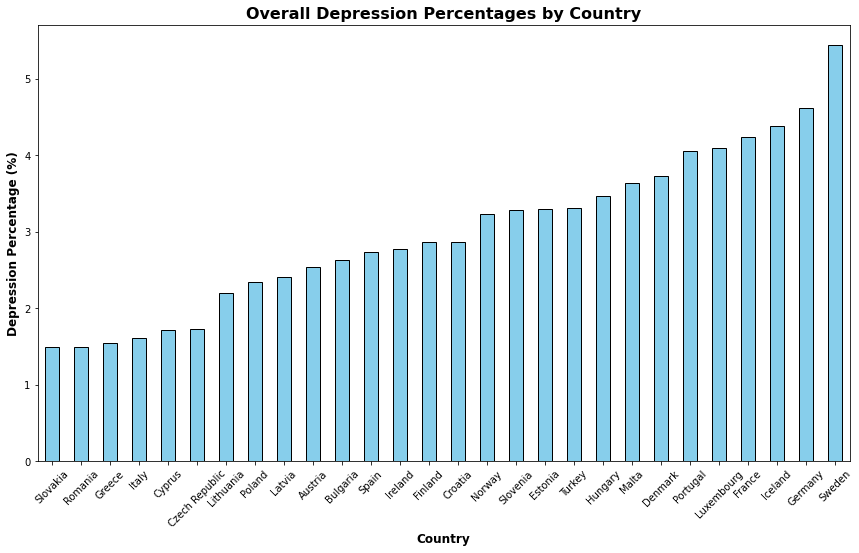

In [7]:
plt.figure(figsize=(12,8))
avg_depression.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Overall Depression Percentages by Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Depression Percentage (%)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show();


In this figure, Contries are compared according to their average depression percentage regarless of age, sex, income level. 

In [8]:
depression_2014=df[df["year"]==2014].groupby(["country","country_label"]).depression_percentage.mean().sort_values().reset_index()
depression_2019=df[df["year"]==2019].groupby(["country","country_label"]).depression_percentage.mean().sort_values().reset_index()
#creating seperate dataframes for years.

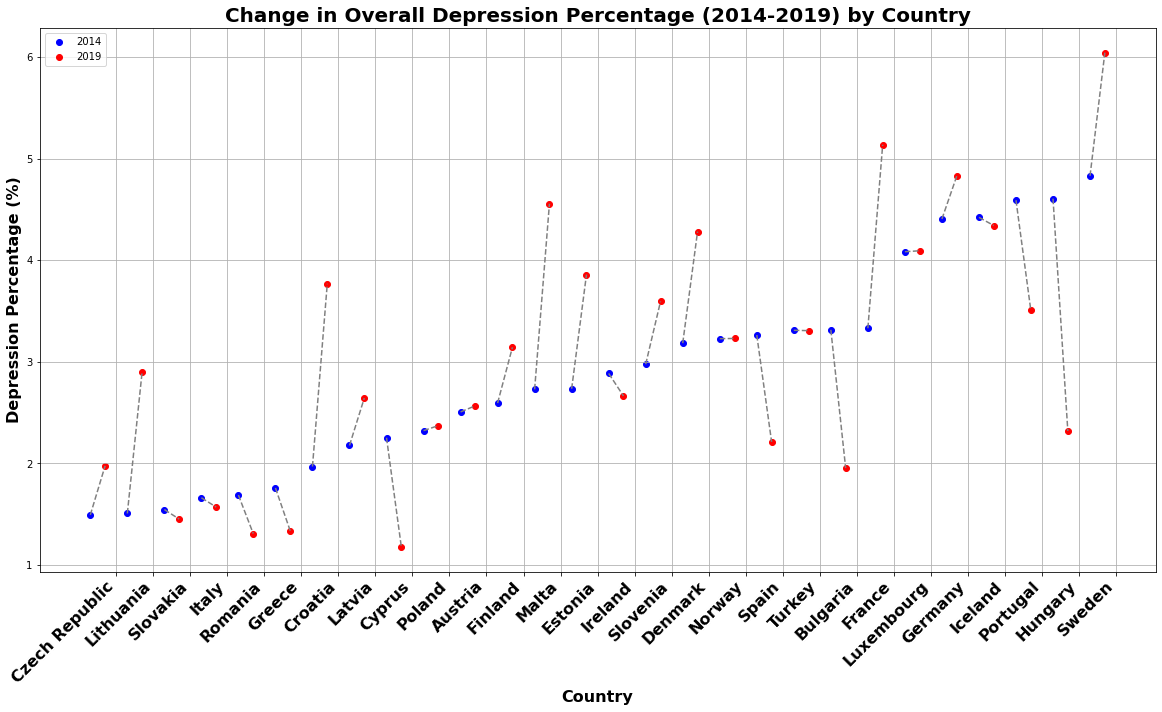

In [9]:
plt.figure(figsize=(20,10))

merged_data = pd.merge(depression_2014, depression_2019, on='country', suffixes=('_2014', '_2019'))

x_offset = 0.2
plt.scatter(np.arange(len(merged_data['country'])) - x_offset, merged_data['depression_percentage_2014'],
            label='2014', color='blue', marker='o')

plt.scatter(np.arange(len(merged_data['country'])) + x_offset, merged_data['depression_percentage_2019'],
            label='2019', color='red', marker='o')

for i in range(len(merged_data)):
    plt.plot([np.arange(len(merged_data['country']))[i] - x_offset, np.arange(len(merged_data['country']))[i] + x_offset],
             [merged_data['depression_percentage_2014'][i], merged_data['depression_percentage_2019'][i]],
             linestyle='--', color='gray')

plt.title('Change in Overall Depression Percentage (2014-2019) by Country', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=16, fontweight='bold')
plt.ylabel('Depression Percentage (%)', fontsize=16, fontweight='bold')
plt.xticks(range(len(merged_data)), merged_data['country_label_2014'], rotation=45, ha='right', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.gca().xaxis.set_ticks([i + 0.5 for i in range(len(merged_data))]) 
plt.gca().set_xticklabels(merged_data['country_label_2014']) 
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


This graph supports the assumption made at the beginning of the report that people are becoming more depressed. As we can see in the graph, the percentage of depression increased significantly for some countries in 2019. While there are countries where the depression percentage dropped, the decrease is much smaller compared to the increase. This suggests a trend towards a higher overall level of depression among people.

In [10]:
df2=df.groupby(["year","country","country_label"])[["depression_percentage","purchase_power"]].mean().sort_values(by=["year","depression_percentage"]).reset_index()

Pearson correlation coefficient: 0.3786608636347642


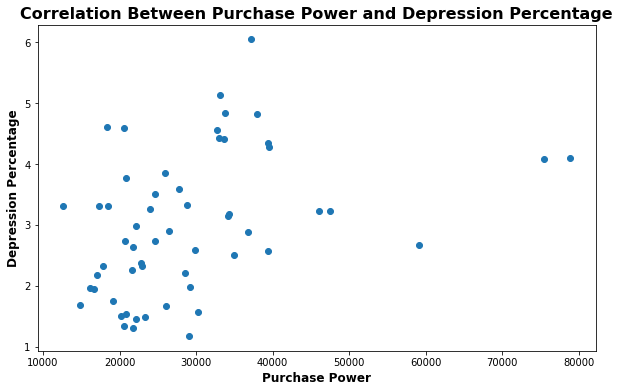

In [11]:

# Scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df2['purchase_power'], df2['depression_percentage'])

# Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(df2['purchase_power'], df2['depression_percentage'])[0, 1]
print(f"Pearson correlation coefficient: {correlation_coefficient}")

plt.title('Correlation Between Purchase Power and Depression Percentage', fontsize=16, fontweight='bold')
plt.xlabel('Purchase Power', fontsize=12, fontweight='bold')
plt.ylabel('Depression Percentage', fontsize=12, fontweight='bold')

plt.show()


Having better purchasing power has several effects on the citizens of a country. People who feel depressed can engage in a variety of hobbies or leisure activities to overcome it. That's why, with improved economic conditions, individuals have more options to uplift their mood.

On the other hand, it is hard to argue that purchasing power is the sole factor influencing depression. Additionally, wealth may not be evenly spread among households, creating disparities in access to resources and opportunities.

It can be seen in the graph that the country's purchasing power and depression percentage do not show a significant correlation. The correlation coefficient is 0.37. Further investigation is needed to understand the relationship between economic indicators and depression percentage at the individual income level.








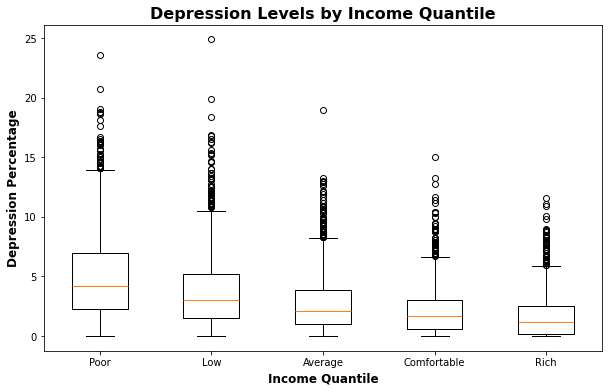

In [12]:
# Boxplot using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['income_quantile'] == 'Poor']['depression_percentage'],
             df[df['income_quantile'] == 'Low']['depression_percentage'],
             df[df['income_quantile'] == 'Average']['depression_percentage'],
             df[df['income_quantile'] == 'Comfortable']['depression_percentage'],
            df[df['income_quantile'] == 'Rich']['depression_percentage']],
            labels=['Poor', 'Low', 'Average', 'Comfortable', 'Rich'])

# Customize the plot
plt.title('Depression Levels by Income Quantile', fontsize=16, fontweight='bold')
plt.xlabel('Income Quantile', fontsize=12, fontweight='bold')
plt.ylabel('Depression Percentage', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


The graph makes it easy to see that when people have more money or a higher income quantile, they tend to feel less depressed. As the income level gets better, the percentage of depression goes down. Even though there are  instances that stand out in each group, like some unusual observations, the main pattern or trend is that depression is going down. So, generally, when people have more money, they are less likely to feel depressed according to what we can see in the graph.

# Conclusion/Discussion

In examining the relationship between depression and economic situations, our analysis reveals a noteworthy correlation influenced by economic realities. Primary focus was on investigating the connection between household income quantiles, purchase power of country and the percentage of depression.

This connection suggests that individuals with higher incomes may experience lower levels of depression, possibly due to the increased capacity to engage in a variety of activities that contribute to overall well-being. Additionally, wealthier individuals may access better medical support, potentially alleviating the impact of depressive feelings.

It is found that the country's purchase power did not exhibit a significant correlation with the percentage of depression in a country. It appears that individual economic conditions play a more pronounced role in influencing mental health compared to the overall economic strength of a nation.

For future research, considering more recent data and approaching the study from different perspectives, such as the influence of global pressures could enhance our understanding. Exploring the influence of personality styles and the aging process on depression is also a promising. While economic conditions undeniably play a role, the complexity of human emotions necessitates a comprehensive exploration of various contributing factors to fully comprehend the intricate tapestry of mental well-being.